<a href="https://colab.research.google.com/github/kevlord997/ML_Algorithmic_Trading_Projects/blob/lesson-4/ML_Trading_L1_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance pandas matplotlib --quiet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

print("Libraries installed and imported successfully!")

Libraries installed and imported successfully!


In [3]:
# 1. Define the ticker and time period
ticker = "SPY"
start_date = "2010-01-01"
end_date = "2024-01-01"

# 2. Download the data
spy_data = yf.download(ticker, start=start_date, end=end_date)

# 3. Display the first few rows (the "head" of the data)
print(f"\n--- Data for {ticker} ---")
print(spy_data.head())
print(f"\nShape of the data (Rows, Columns): {spy_data.shape}")

/tmp/ipython-input-3654442067.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


--- Data for SPY ---
Price           Close       High        Low       Open     Volume
Ticker            SPY        SPY        SPY        SPY        SPY
Date                                                             
2010-01-04  85.279221  85.324368  83.909697  84.556835  118944600
2010-01-05  85.504921  85.542548  84.917983  85.226505  111579900
2010-01-06  85.565109  85.775804  85.354414  85.422135  116074400
2010-01-07  85.926308  86.031655  85.166296  85.407091  131091100
2010-01-08  86.212311  86.249937  85.527552  85.700620  126402800

Shape of the data (Rows, Columns): (3522, 5)


In [4]:
spy_data.columns = spy_data.columns.get_level_values(0)
spy_data.rename(columns={'Close': 'Adj Close'}, inplace=True)

In [5]:
spy_data.head()

Price,Adj Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,85.279221,85.324368,83.909697,84.556835,118944600
2010-01-05,85.504921,85.542548,84.917983,85.226505,111579900
2010-01-06,85.565109,85.775804,85.354414,85.422135,116074400
2010-01-07,85.926308,86.031655,85.166296,85.407091,131091100
2010-01-08,86.212311,86.249937,85.527552,85.700620,126402800


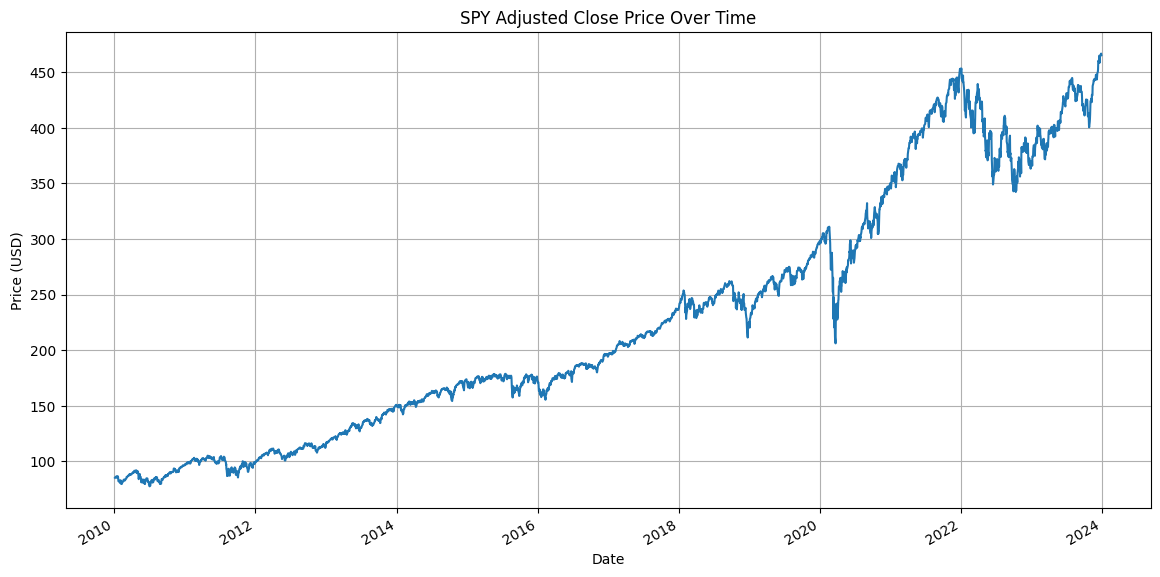

In [6]:
# Plotting the Adjusted Closing Price
plt.figure(figsize=(14, 7))
spy_data['Adj Close'].plot(title=f'{ticker} Adjusted Close Price Over Time',
                           xlabel='Date',
                           ylabel='Price (USD)',
                           grid=True)
plt.show()

In [7]:
# 1. Calculate the 20-day SMA (Short-term trend)
spy_data['SMA_20'] = spy_data['Adj Close'].rolling(window=20).mean()

# 2. Calculate the 100-day SMA (Long-term trend)
spy_data['SMA_100'] = spy_data['Adj Close'].rolling(window=100).mean()


In [8]:

print("\n--- Data with New Features (SMAs) ---")
spy_data.head(20)


--- Data with New Features (SMAs) ---


Price,Adj Close,High,Low,Open,Volume,SMA_20,SMA_100
Date,,,,,,,
2010-01-04,85.279221,85.324368,83.909697,84.556835,118944600,NaN,NaN
2010-01-05,85.504921,85.542548,84.917983,85.226505,111579900,NaN,NaN
2010-01-06,85.565109,85.775804,85.354414,85.422135,116074400,NaN,NaN
2010-01-07,85.926308,86.031655,85.166296,85.407091,131091100,NaN,NaN
2010-01-08,86.212311,86.249937,85.527552,85.700620,126402800,NaN,NaN
2010-01-11,86.332672,86.633662,85.963950,86.596041,106375700,NaN,NaN
2010-01-12,85.527565,85.941429,85.196469,85.760834,163333500,NaN,NaN
2010-01-13,86.249916,86.490711,85.309309,85.745746,161822000,NaN,NaN
2010-01-14,86.483170,86.641191,86.099400,86.152074,115718800,NaN,NaN


In [9]:
spy_data.dropna(inplace=True)

In [10]:
spy_data.head(20)

Price,Adj Close,High,Low,Open,Volume,SMA_20,SMA_100
Date,,,,,,,
2010-05-26,80.976021,82.713868,80.734234,81.965841,349719300,85.960585,86.090673
2010-05-27,83.688507,83.718731,82.192448,82.502240,300870500,85.579014,86.074766
2010-05-28,82.638275,83.658313,82.245368,83.597865,297933500,85.222379,86.046099
2010-06-01,81.248009,83.076522,81.127118,81.867588,277909400,84.738050,86.002928
2010-06-02,83.363647,83.371199,81.232899,81.663582,240243700,84.466417,85.977301
2010-06-03,83.650742,83.915195,82.796933,83.605408,226618300,84.235585,85.951686
2010-06-04,80.711563,82.608082,80.439552,82.064061,398475600,84.004377,85.895475
2010-06-07,79.706604,81.308445,79.646162,80.998653,264609100,83.786389,85.837265
2010-06-08,80.560417,80.719089,79.071915,79.767051,357774300,83.425975,85.780370


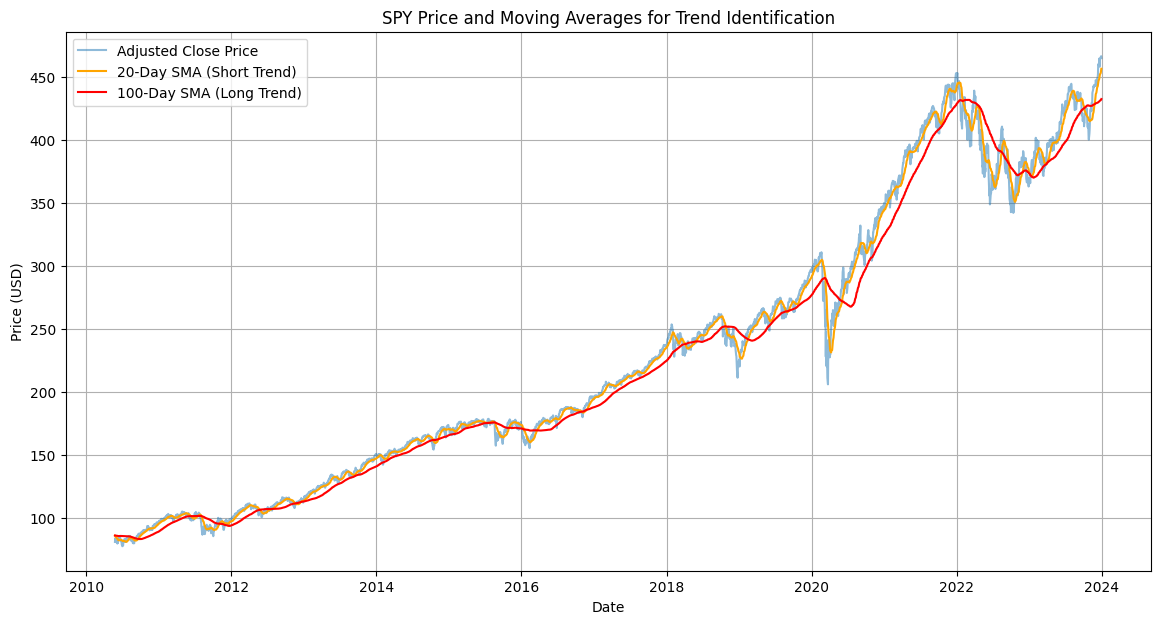

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(spy_data['Adj Close'], label='Adjusted Close Price', alpha=0.5)
plt.plot(spy_data['SMA_20'], label='20-Day SMA (Short Trend)', color='orange')
plt.plot(spy_data['SMA_100'], label='100-Day SMA (Long Trend)', color='red')
plt.title(f'{ticker} Price and Moving Averages for Trend Identification')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import numpy as np

# 1. Define the look-ahead period (N days)
N = 5

# 2. Shift the Adjusted Close price N days backwards
# This puts the price from 5 days in the future on the SAME row as today's data.
spy_data['Future_Price'] = spy_data['Adj Close'].shift(-N)

# 3. Create the Target Variable (Y)
# If the Future Price is higher than Today's Price, the Target is 1 (UP), otherwise 0 (DOWN).
spy_data['Target'] = np.where(spy_data['Future_Price'] > spy_data['Adj Close'], 1, 0)



In [13]:
# Display the last few rows to see the new columns
print(spy_data.tail(10))

Price        Adj Close        High         Low        Open     Volume  \
Date                                                                    
2023-12-15  459.360931  460.701856  457.501295  459.517536  141553700   
2023-12-18  461.944885  462.933441  459.909080  460.975923   70375300   
2023-12-19  464.753876  464.832193  462.414657  462.492945   55761800   
2023-12-20  458.313660  465.791362  457.883003  463.892568  102921000   
2023-12-21  462.659363  462.933414  458.881338  461.318438   86667500   
2023-12-22  463.589142  465.282405  461.680580  463.794673   67160400   
2023-12-26  465.546661  466.456900  463.921918  464.000235   55387000   
2023-12-27  466.388428  466.535236  464.802843  465.341149   68000300   
2023-12-28  466.564575  467.406293  466.143716  466.750542   77158100   
2023-12-29  465.213928  466.897395  463.246613  466.368857  122283100   

Price           SMA_20     SMA_100  Future_Price  Target  
Date                                                      
2023-

In [14]:
# Drop all remaining NaN values (the last N rows)
spy_data.dropna(inplace=True)

# Define our features (X) and target (Y)
X = spy_data[['SMA_20', 'SMA_100']]
Y = spy_data['Target']

print(f"\nFinal Data Shape (X): {X.shape}")
print(f"Final Target Shape (Y): {Y.shape}")


Final Data Shape (X): (3418, 2)
Final Target Shape (Y): (3418,)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# 1. Split the data chronologically (80% Train, 20% Test)
# We use indexing instead of train_test_split's built-in shuffle to preserve time order.
split_point = int(len(X) * 0.8)

X_train = X[:split_point]
X_test = X[split_point:]
Y_train = Y[:split_point]
Y_test = Y[split_point:]

# 2. Scale the features
# KNN is sensitive to the scale of features. We use StandardScaler.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train the KNN Model
# We start with K=10 neighbors
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
from sklearn.metrics import accuracy_score, classification_report

# 1. Make predictions on the unseen Test data
Y_pred = knn_model.predict(X_test_scaled)

# 2. Calculate Accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print(f"\n--- Model Evaluation (KNN) ---")
print(f"Accuracy on Test Set: {accuracy:.4f}")

# 3. Detailed Report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


--- Model Evaluation (KNN) ---
Accuracy on Test Set: 0.5804

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       287
           1       0.58      1.00      0.73       397

    accuracy                           0.58       684
   macro avg       0.29      0.50      0.37       684
weighted avg       0.34      0.58      0.43       684



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# Import the talib library (needs installation in Colab)
!pip install ta --quiet
from ta.momentum import RSIIndicator
from ta.trend import ADXIndicator # We'll use ADX later, but good to import from here

# 1. Calculate RSI (Commonly 14 periods)
rsi_indicator = RSIIndicator(close=spy_data['Adj Close'], window=14)
spy_data['RSI'] = rsi_indicator.rsi()

# 2. Calculate Momentum (Commonly 10 periods)
spy_data['MOM'] = spy_data['Adj Close'].diff(periods=10)

# Re-clean data (MOM and RSI will introduce new NaNs at the start)
spy_data.dropna(inplace=True)

# Re-define features (X) to include the new indicators
X = spy_data[['SMA_20', 'SMA_100', 'RSI', 'MOM']]
Y = spy_data['Target'] # Y remains the same

print(f"New Features: {X.columns.tolist()}")
print(f"Data Shape after new features: {X.shape}")

  Preparing metadata (setup.py) ... done
New Features: ['SMA_20', 'SMA_100', 'RSI', 'MOM']
Data Shape after new features: (3405, 4)


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# 1. Create a Pipeline (Scale and KNN together for clean tuning)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# 2. Define the parameter grid (a range of K values to test)
param_grid = {'knn__n_neighbors': np.arange(1, 31)} # Test K from 1 to 30

# 3. Create a Time Series Split (to ensure proper chronological validation)
# Since GridSearchCV shuffles by default, we'll use a specific time series cross-validation technique
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5) # 5 splits for validation

# 4. Perform Grid Search
grid_search = GridSearchCV(pipe, param_grid, cv=tscv, scoring='accuracy', verbose=0)
grid_search.fit(X, Y) # Train on the full dataset (GridSearchCV handles the splitting)

print(f"\nBest K Value Found: {grid_search.best_params_['knn__n_neighbors']}")
print(f"Accuracy with Best K: {grid_search.best_score_:.4f}")


Best K Value Found: 29
Accuracy with Best K: 0.5559


In [19]:
# Use the optimal K value found by the grid search
best_k = grid_search.best_params_['knn__n_neighbors']

# Re-split the data (chronologically, 80/20)
split_point = int(len(X) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
Y_train, Y_test = Y[:split_point], Y[split_point:]

# Scale the data using the fit_transform/transform method
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the final model
final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
final_knn_model.fit(X_train_scaled, Y_train)

# Make predictions and evaluate
Y_pred = final_knn_model.predict(X_test_scaled)

print(f"\n--- Final Model Evaluation (K={best_k}) ---")
print(f"Accuracy on Test Set: {accuracy_score(Y_test, Y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


--- Final Model Evaluation (K=29) ---
Accuracy on Test Set: 0.4934

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.26      0.31       287
           1       0.55      0.66      0.60       394

    accuracy                           0.49       681
   macro avg       0.46      0.46      0.45       681
weighted avg       0.47      0.49      0.48       681



In [20]:
from sklearn.tree import DecisionTreeClassifier

# Re-use the data split from Lesson 3 (X_train, Y_train, X_test, Y_test)
# Note: Decision Trees are not sensitive to scaling, so we use the unscaled X data.

# Initialize the Decision Tree Model
# We set a max depth to prevent severe overfitting for now
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
dt_model.fit(X_train, Y_train)

# Make predictions
dt_Y_pred = dt_model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate performance
dt_accuracy = accuracy_score(Y_test, dt_Y_pred)

print(f"\n--- Decision Tree Model Evaluation ---")
print(f"Accuracy on Test Set: {dt_accuracy:.4f}")

# Detailed Report
print("\nClassification Report:")
print(classification_report(Y_test, dt_Y_pred))


--- Decision Tree Model Evaluation ---
Accuracy on Test Set: 0.5786

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       287
           1       0.58      1.00      0.73       394

    accuracy                           0.58       681
   macro avg       0.29      0.50      0.37       681
weighted avg       0.33      0.58      0.42       681



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


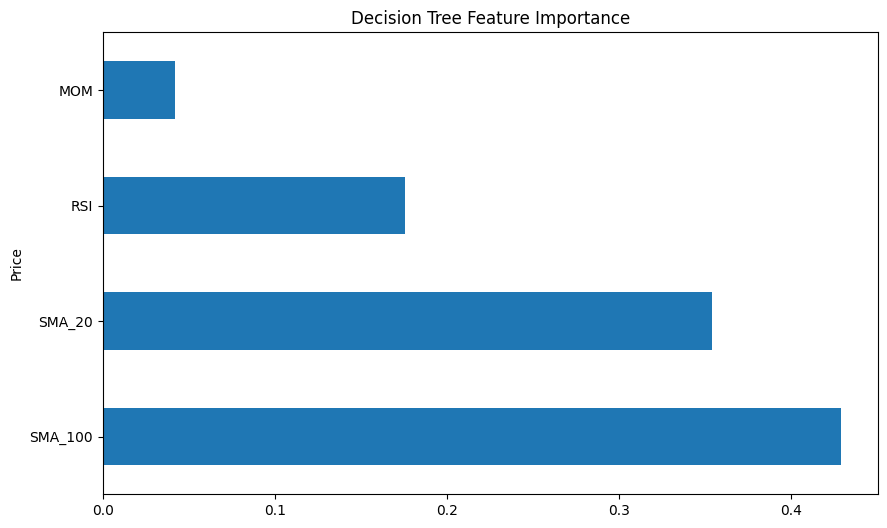

In [22]:
# Get the feature importance scores
import pandas as pd
feature_importances = pd.Series(dt_model.feature_importances_, index=X_train.columns)

# Plot the results
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', title='Decision Tree Feature Importance')
plt.show()